In [92]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
# %matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data1 = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [4]:
columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = data1['STATE'].unique()

for s in states:
    data1.loc[data1['STATE']== s, columns] = data1.loc[data1['STATE']==s,  columns].interpolate()

data1.dropna(inplace=True)

In [5]:
data1.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


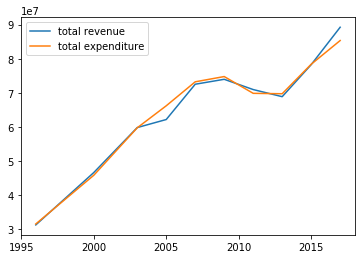

In [15]:
ca_r = data1[data1['STATE']=='CALIFORNIA']['TOTAL_REVENUE']
ca_e = data1[data1['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE']
ca_y = data1[data1['STATE']=='CALIFORNIA']['YEAR']

plt.plot(ca_y, ca_r, label="total revenue")
plt.plot(ca_y, ca_e, label ='total expenditure')
plt.legend()
plt.show()


([<matplotlib.axis.XTick at 0x1c60145f4e0>,
 <a list of 10 Text xticklabel objects>)

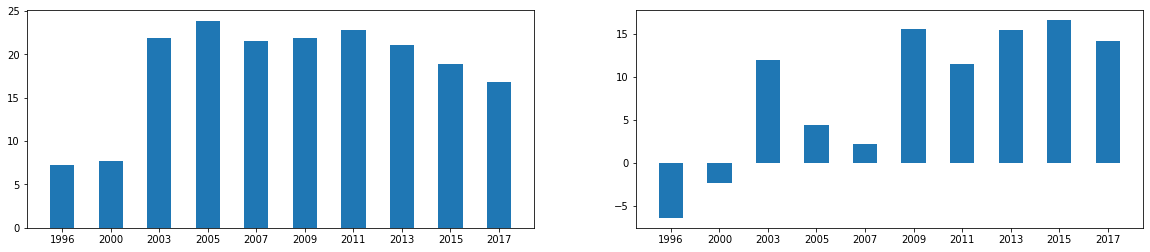

In [105]:
y1 = data1[data1['STATE']=='CALIFORNIA']['AVG_MATH_4_SCORE'] - data1[data1['STATE']=='CALIFORNIA']['AVG_READING_4_SCORE']
y2 = data1[data1['STATE']=='CALIFORNIA']['AVG_MATH_8_SCORE'] - data1[data1['STATE']=='CALIFORNIA']['AVG_READING_8_SCORE']
    
x = data1[data1['STATE']=='CALIFORNIA']['YEAR']
x1 = [1,2,3,4,5,6,7,8,9,10]    
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.bar( x1,y1, width = 0.5)
plt.xticks(x1,x)

plt.subplot(1,2,2)
plt.bar( x1,y2, width = 0.5)
plt.xticks(x1,x)


(array([  4.,   3.,   4.,  35.,  52.,  79., 126., 121.,  36.,   6.]),
 array([236.37910176, 240.79110458, 245.2031074 , 249.61511022,
        254.02711304, 258.43911586, 262.85111868, 267.2631215 ,
        271.67512432, 276.08712715, 280.49912997]),
 <a list of 10 Patch objects>)

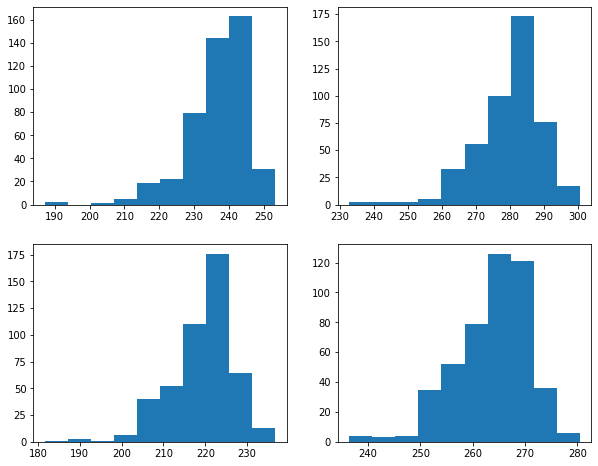

In [111]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(data1['AVG_MATH_4_SCORE'])
plt.subplot(2,2,2)
plt.hist(data1['AVG_MATH_8_SCORE'])
plt.subplot(2,2,3)
plt.hist(data1['AVG_READING_4_SCORE'])
plt.subplot(2,2,4)
plt.hist(data1['AVG_READING_8_SCORE'])

In [117]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data2 = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

(array([  4.,   3.,   4.,  41., 125., 587., 390., 282.,  49.,   6.]),
 array([236.37910176, 240.79110458, 245.2031074 , 249.61511022,
        254.02711304, 258.43911586, 262.85111868, 267.2631215 ,
        271.67512432, 276.08712715, 280.49912997]),
 <a list of 10 Patch objects>)

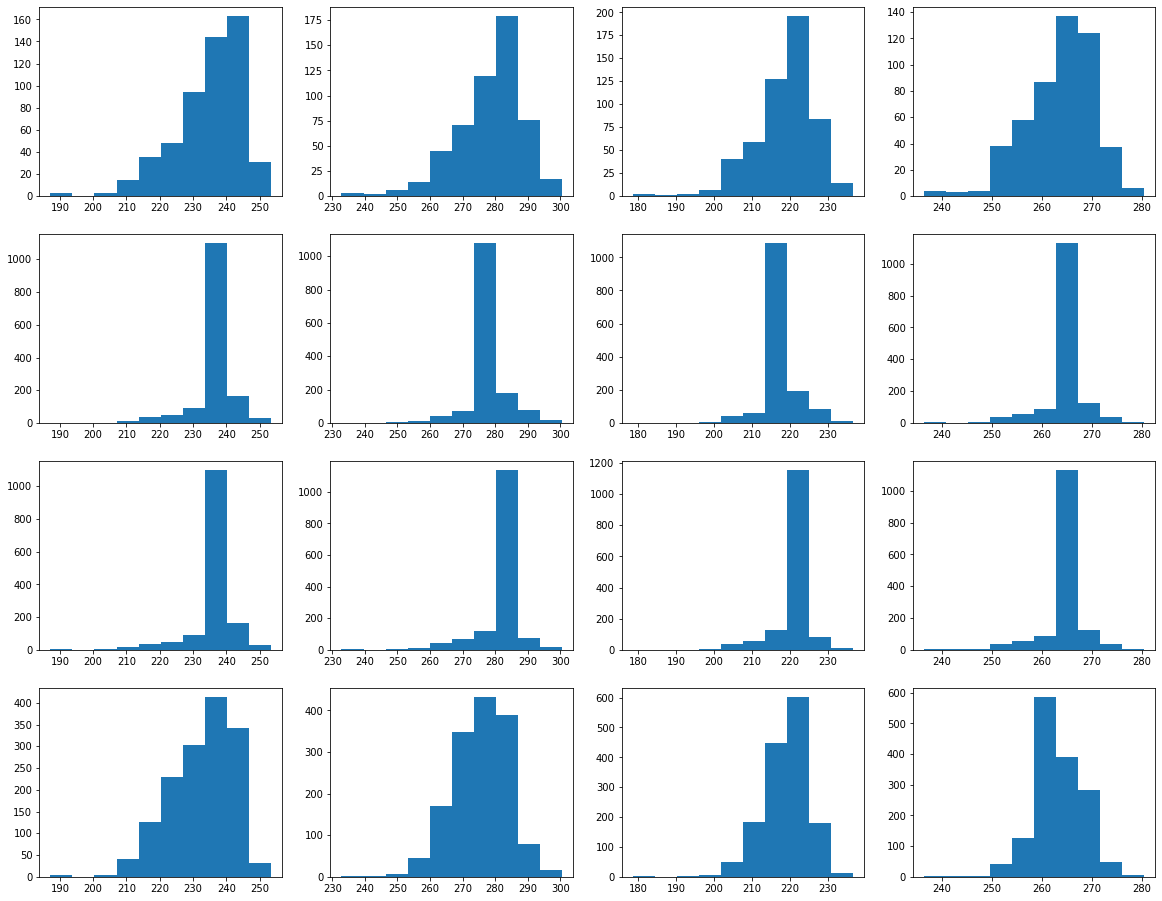

In [120]:
data2['AVG_MATH_4_SCORE'].fillna(data2['AVG_MATH_4_SCORE'].mean())
data2['AVG_MATH_8_SCORE'].fillna(data2['AVG_MATH_8_SCORE'].mean())
data2['AVG_READING_4_SCORE'].fillna(data2['AVG_READING_4_SCORE'].mean())
data2['AVG_READING_8_SCORE'].fillna(data2['AVG_READING_8_SCORE'].mean())

plt.figure(figsize=(20,16))
plt.subplot(4,4,1)
plt.hist(data2['AVG_MATH_4_SCORE'].dropna())
plt.subplot(4,4,2)
plt.hist(data2['AVG_MATH_8_SCORE'].dropna())
plt.subplot(4,4,3)
plt.hist(data2['AVG_READING_4_SCORE'].dropna())
plt.subplot(4,4,4)
plt.hist(data2['AVG_READING_8_SCORE'].dropna())

plt.subplot(4,4,5)
plt.hist(data2['AVG_MATH_4_SCORE'].fillna(data2['AVG_MATH_4_SCORE'].mean()))
plt.subplot(4,4,6)
plt.hist(data2['AVG_MATH_8_SCORE'].fillna(data2['AVG_MATH_8_SCORE'].mean()))
plt.subplot(4,4,7)
plt.hist(data2['AVG_READING_4_SCORE'].fillna(data2['AVG_READING_4_SCORE'].mean()))
plt.subplot(4,4,8)
plt.hist(data2['AVG_READING_8_SCORE'].fillna(data2['AVG_READING_8_SCORE'].mean()))

plt.subplot(4,4,9)
plt.hist(data2['AVG_MATH_4_SCORE'].fillna(data2['AVG_MATH_4_SCORE'].median()))
plt.subplot(4,4,10)
plt.hist(data2['AVG_MATH_8_SCORE'].fillna(data2['AVG_MATH_8_SCORE'].median()))
plt.subplot(4,4,11)
plt.hist(data2['AVG_READING_4_SCORE'].fillna(data2['AVG_READING_4_SCORE'].median()))
plt.subplot(4,4,12)
plt.hist(data2['AVG_READING_8_SCORE'].fillna(data2['AVG_READING_8_SCORE'].median()))

plt.subplot(4,4,13)
plt.hist(data2['AVG_MATH_4_SCORE'].fillna(data2['AVG_MATH_4_SCORE'].interpolate()))
plt.subplot(4,4,14)
plt.hist(data2['AVG_MATH_8_SCORE'].fillna(data2['AVG_MATH_8_SCORE'].interpolate()))
plt.subplot(4,4,15)
plt.hist(data2['AVG_READING_4_SCORE'].fillna(data2['AVG_READING_4_SCORE'].interpolate()))
plt.subplot(4,4,16)
plt.hist(data2['AVG_READING_8_SCORE'].fillna(data2['AVG_READING_8_SCORE'].interpolate()))